In [5]:
import numpy as np

import pathlib
from datetime import datetime
from dateutil.relativedelta import *

import openeo

from openeo.extra.spectral_indices.spectral_indices import append_index
from openeo.processes import exp, array_element,log, count,normalized_difference, gte, eq, neq, sum
from openeo.processes import if_
import xarray as xr

connection = openeo.connect(
    url = "openeo-dev.vito.be")
connection.authenticate_oidc()

Authenticated using refresh token.


<Connection to 'https://openeo-dev.vito.be/openeo/1.1/' with OidcBearerAuth>

In [6]:
spatial_extent = {'west': -99.5945352421805, 'east': -99.28125322924105, 'south': 24.888086962860328, 'north': 24.950359025232224, 'crs': 4326}
bands = ["VH", "VV"]
start_date, end_date = "2021-12-01", "2021-12-10"
## Get Sentinel-1 data for a 1 month window and convert to ARD data.

s1_cube = connection.load_collection(
    'SENTINEL1_GRD', 
     spatial_extent = spatial_extent, 
     temporal_extent = [start_date, end_date], 
     bands =  ["VH", "VV"],
     properties = {"polarization": lambda p: p == "DV"})


s1_cube = s1_cube.ard_normalized_radar_backscatter(elevation_model="COPERNICUS_30")
s1_cube = s1_cube.rename_labels("bands",["VH","VV","mask", "incidence_angle"])
s1_cube_mask = s1_cube.band("mask")


# radar shadow mask has value 2
s1_mask_RS= (s1_cube_mask == 2)
s1_cube = s1_cube.mask(s1_mask_RS)


s1_cube.download("s1_cube_TEST.nc")


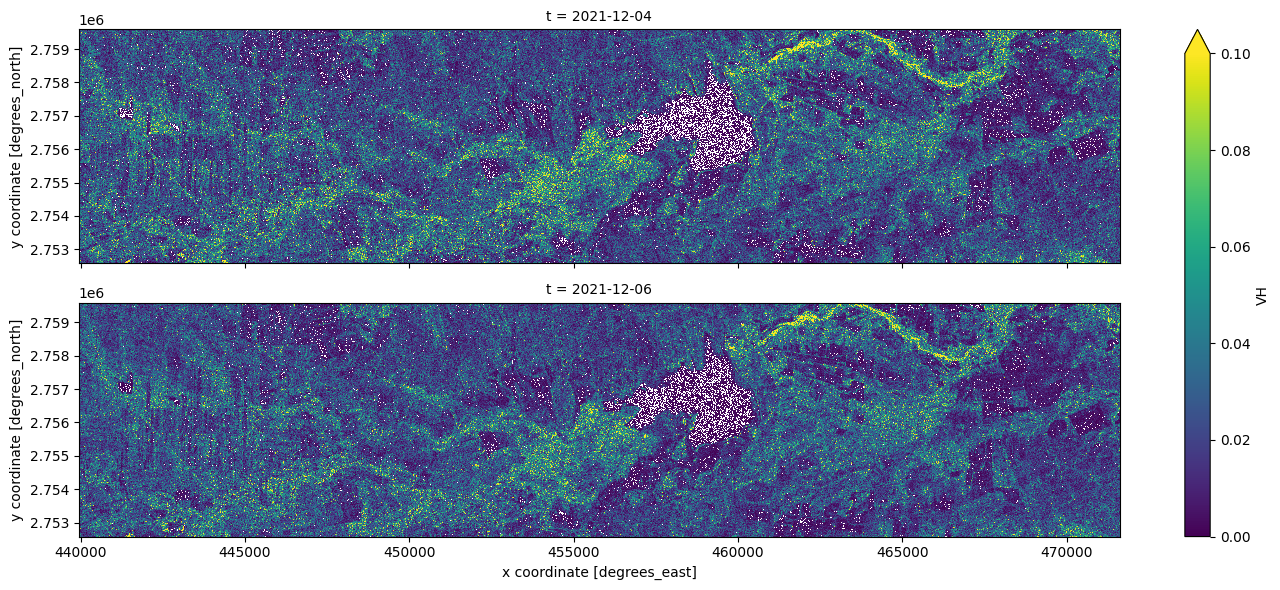

In [9]:

# See if missing pixel are also from job download 
ds = xr.load_dataset("s1_cube_TEST.nc")
ds["VH"].plot.imshow(row="t", figsize=(14,6), vmin=0, vmax=.1)

In [3]:
s1_cube_save = s1_cube.save_result(format='netCDF') #GTiff #netCDF
my_job  = s1_cube_save.send_job(title="s1_cube_TEST")
results = my_job.start_and_wait().get_results()
results.download_files('s1_cube_TEST')

C:\Users\ansu\AppData\Local\Temp\ipykernel_22268\1617892155.py:2: DeprecationWarning: Call to deprecated method `send_job`, use `create_job` instead.
  my_job  = s1_cube_save.send_job(title="s1_cube_TEST")


0:00:00 Job 'j-bd962386a25d4a36b144ed05a5c3f003': send 'start'
0:00:06 Job 'j-bd962386a25d4a36b144ed05a5c3f003': queued (progress N/A)
0:00:12 Job 'j-bd962386a25d4a36b144ed05a5c3f003': queued (progress N/A)
0:00:18 Job 'j-bd962386a25d4a36b144ed05a5c3f003': queued (progress N/A)
0:00:26 Job 'j-bd962386a25d4a36b144ed05a5c3f003': queued (progress N/A)
0:00:37 Job 'j-bd962386a25d4a36b144ed05a5c3f003': queued (progress N/A)
0:00:49 Job 'j-bd962386a25d4a36b144ed05a5c3f003': queued (progress N/A)
0:01:05 Job 'j-bd962386a25d4a36b144ed05a5c3f003': queued (progress N/A)
0:01:25 Job 'j-bd962386a25d4a36b144ed05a5c3f003': queued (progress N/A)
0:01:49 Job 'j-bd962386a25d4a36b144ed05a5c3f003': queued (progress N/A)
0:02:19 Job 'j-bd962386a25d4a36b144ed05a5c3f003': queued (progress N/A)
0:02:57 Job 'j-bd962386a25d4a36b144ed05a5c3f003': queued (progress N/A)
0:03:44 Job 'j-bd962386a25d4a36b144ed05a5c3f003': queued (progress N/A)
0:04:42 Job 'j-bd962386a25d4a36b144ed05a5c3f003': queued (progress N/A)
0

[WindowsPath('s1_cube_TEST/openEO.nc'),
 WindowsPath('s1_cube_TEST/s1_rtc_04D9AE_N24W100_2021_12_04_MULTIBAND.tif'),
 WindowsPath('s1_cube_TEST/s1_rtc_04D9AE_N24W100_2021_12_04_metadata.json'),
 WindowsPath('s1_cube_TEST/s1_rtc_04DAE9_N24W100_2021_12_06_MULTIBAND.tif'),
 WindowsPath('s1_cube_TEST/s1_rtc_04DAE9_N24W100_2021_12_06_metadata.json'),
 WindowsPath('s1_cube_TEST/job-results.json')]

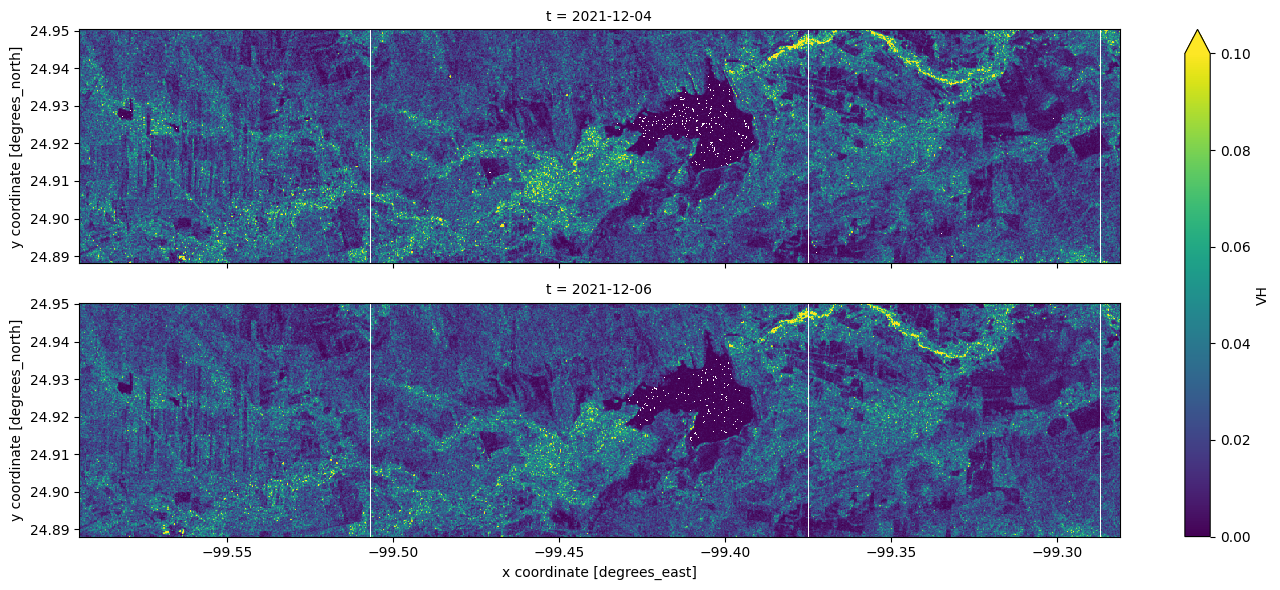

In [4]:

# See if missing pixel are also from job download 
ds = xr.load_dataset("s1_cube_TEST/openEO.nc")
ds["VH"].plot.imshow(row="t", figsize=(14,6), vmin=0, vmax=.1)